It's obvious that `presure` would be getting closer to `u_in` in the end

So let's use the last value of `u_in` in time series as new feature

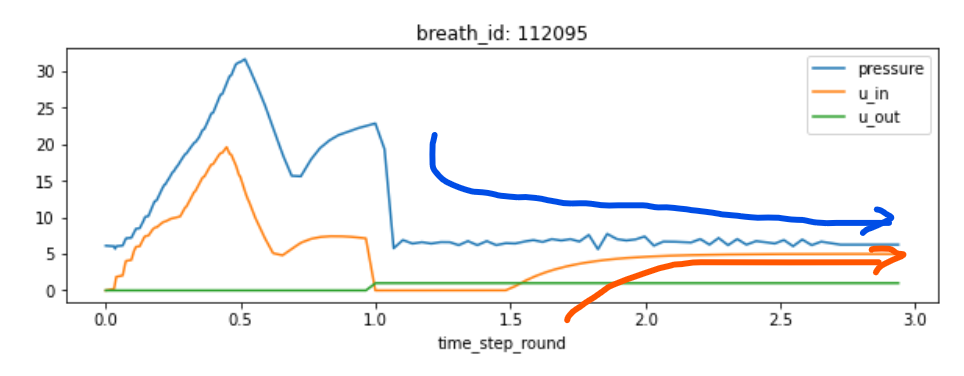

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import lightgbm as lgb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
%time
train = pd.read_csv('../input/ventilator-pressure-prediction/train.csv',index_col=0)
test  = pd.read_csv('../input/ventilator-pressure-prediction/test.csv', index_col=0)
sample_submission     = pd.read_csv('../input/ventilator-pressure-prediction/sample_submission.csv')

In [ ]:
idxmax_time_step = train.groupby('breath_id')['time_step'].idxmax()
last_value_u_in = train.loc[idxmax_time_step, ['breath_id','u_in']]
last_value_u_in.columns = ['breath_id','last_value_u_in']

train = train.merge(last_value_u_in, on='breath_id')
train

In [ ]:
idxmax_time_step = test.groupby('breath_id')['time_step'].idxmax()
last_value_u_in = test.loc[idxmax_time_step, ['breath_id','u_in']]
last_value_u_in.columns = ['breath_id','last_value_u_in']

test = test.merge(last_value_u_in, on='breath_id')
test

In [ ]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(train.drop(['breath_id', 'pressure'], axis=1), train['pressure'])

In [ ]:
test['pressure'] = lgb_model.predict(test.drop('breath_id', axis=1))
sample_submission['pressure'] = test['pressure']

In [ ]:
sample_submission.to_csv('sample_submission.csv', index=False)